### RMS 타이타닉 침몰사고관련 여객 정보
-- 1. 생존자 수 분석 : 생존자 수와 사망자 수를 비교 시각화 -> 생존율에 영향을 미치는 요인을 분석  
-- 2. 객실 등급별 분석 : pclass에 따른 분석 -> 객실 등급이 생존에 미치는 영향  
-- 3. 성별에 따른 생존율 분석 : 성별에 따른 분석률  
-- 4. 나이 분포 및 연령대별 생존률  
-- 5. 탑승 항구 별 승객 분석 : 승객의 분포와 생존율 등  

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns #파이썬 모듈 중 통계 시각화 라이브러리
import matplotlib.pyplot as plt


In [2]:
titanic = sns.load_dataset('titanic')

'survived' : 승객 생존 유무 (0:사망 , 1:생존)   
'pclass' :티켓클래스(1=1등석 , 2= 2등석 , 3=3등석) , 사회 경제적 위치  
'sex' : 성별  
'age' : 나이  
'sibsp' : 탑승 형제,자매,배우자 수  
'parch' : 탑승 부모,자녀의 수  
'fare'  : 요금 
'embarked' : 승객이 탑승한 항구(C=쉘부르,Q=퀸스타운,S=사우스햄프턴)  
'class'  = category : 티켓을 문장열로 표현 First ,Second , Third등 , "pclass"의 카테고리 버전  
'who'  : 승객을 man ,woman , child로 구분('sex','age'데이터를 기반으로 결정)  
'adult_male' : 승객이 성인 남성 유무 ('sex','age'데이터를 기반으로 결정)  
'deck'  : 객실의 데크 'cabin'데이터에서 추출된 첫번째 문자 , A,B,C로 표시한다
'embark_town'  : 탑승항구 도시 'embarked'의 상세 버전 cherbourg , Queenstown , Southampton
'alive'  : 생존 유무 'survived'의 문자열 버전
'alone'  : 혼자 탑승 유무 , sibsp,parch의 데이터를 기반으로 생성

* 성별, 나이, 가족관계, 사회 경제적 위치 등을 통한 승객분석

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Q1.승객목록 보기  

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Q2.생존 현황보기

In [6]:
titanic.groupby('survived').count()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,,
0,549,549,424,549,549,549,549,549,549,549,67,549,549,549
1,342,342,290,342,342,342,340,342,342,342,136,340,342,342


### Q3. 탑승 클래스 보기

In [7]:
# 탑승 클래스별 뷰
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


### Q4. 연령별 그룹별 집계를 구현해보자
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True) 


In [8]:
#titanic.groupby('age').count()
age_bins = [0,10,20,30,40,50,60,70,80,90,100,110,120]
#age_labels = ['Child','Teen','Adult','Senior']
titanic['age_group'] = pd.cut(titanic['age'],bins=age_bins) #labels = age_labels 
#titanic
titanic.groupby('age_group').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
age_group,,,,,,,,,,,,,,,
"(0, 10]",64,64,64,64,64,64,64,64,64,64,64,10,64,64,64
"(10, 20]",115,115,115,115,115,115,115,115,115,115,115,19,115,115,115
"(20, 30]",230,230,230,230,230,230,230,230,230,230,230,40,230,230,230
"(30, 40]",155,155,155,155,155,155,155,154,155,155,155,50,154,155,155
"(40, 50]",86,86,86,86,86,86,86,86,86,86,86,32,86,86,86
"(50, 60]",42,42,42,42,42,42,42,42,42,42,42,22,42,42,42
"(60, 70]",17,17,17,17,17,17,17,16,17,17,17,9,16,17,17
"(70, 80]",5,5,5,5,5,5,5,5,5,5,5,2,5,5,5
"(80, 90]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q5. 성별 생존률집계를 구현해보자

In [9]:
titanic.groupby('sex')['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

### Q6. 요금 구간별 뷰를 구현하고 집계를 내보자

In [10]:
#titanic.groupby('age').count()
fare_bins = [0,10,20,50,100,500]
fare_labels = ['0-10','10-20','20-50','50-100','100+']
titanic['fare_bracket'] = pd.cut(titanic['fare'],bins=fare_bins ,labels = fare_labels ) #labels = age_labels 
titanic
titanic.groupby('fare_bracket').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
fare_bracket,,,,,,,,,,,,,,,,
0-10,321,321,321,229,321,321,321,321,321,321,321,6,321,321,321,229
10-20,179,179,179,155,179,179,179,179,179,179,179,17,179,179,179,155
20-50,216,216,216,185,216,216,216,216,216,216,216,56,216,216,216,185
50-100,107,107,107,90,107,107,107,105,107,107,107,78,105,107,107,90
100+,50,50,50,45,50,50,50,50,50,50,50,41,50,50,50,45


### Q7. 객실 유형별 뷰를 생존의 집계를 확인 해보자

### Q8.가족 /동행자 수 별 생존집계를 확인해 보자

In [11]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch']
titanic.groupby('family_size')['survived'].count()

family_size
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: survived, dtype: int64

### Q9.승선장소 별 생존집계를 확인해 보자

In [12]:
titanic.groupby('embarked')['survived'].count()

embarked
C    168
Q     77
S    644
Name: survived, dtype: int64

### Q10.갑판별 집계를 확인해 보자(객실정보 cabin의 첫글자로 데이터 구성)

In [13]:
titanic.groupby('deck')['survived'].count()

deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
Name: survived, dtype: int64

### Q11.승선항 및 클래스 뷰를 확인하자

In [14]:
titanic.groupby(['embarked','class']).count()

survived  pclass  sex  age  sibsp  parch  fare  who  \
embarked class                                                         
C        First         85      85   85   74     85     85    85   85   
         Second        17      17   17   15     17     17    17   17   
         Third         66      66   66   41     66     66    66   66   
Q        First          2       2    2    2      2      2     2    2   
         Second         3       3    3    2      3      3     3    3   
         Third         72      72   72   24     72     72    72   72   
S        First        127     127  127  108    127    127   127  127   
         Second       164     164  164  156    164    164   164  164   
         Third        353     353  353  290    353    353   353  353   

                 adult_male  deck  embark_town  alive  alone  age_group  \
embarked class                                                            
C        First           85    66           85     85     85         74   
         Second          17     2           17     17     17         15   
         Third           66     1           66     66     66         41   
Q        First            2     2            2      2      2          2   
         Second           3     1            3      3      3          2   
         Third           72     1           72     72     72         24   
S        First          127   105          127    127    127        108   
         Second         164    13          164    164    164        156   
         Third          353    10          353    353    353        290   

                 fare_bracket  family_size  
embarked class                              
C        First             82           85  
         Second            17           17  
         Third             66           66  
Q        First              2            2  
         Second             3            3  
         Third             72           72  
S        First            122          127  
         Second           158          164  
         Third            349          353

### Q12 다양한 연령층과 성별에 따른 생존율을 확인해보자
unstack() : MultiIndex의 피벗의 레이블을 재구성할 때 사용한다  
            DataFrame의 행 인덱스를 열인덱스로 변환하는 역할을 한다

In [15]:
titanic['age_group'] = pd.cut(titanic['age'] , bins = [0,18,65,100] , labels=['Child','Adult','Senior']  )
#titanic.groupby(['sex','age_group','survived']).count()
#titanic.groupby(['sex','age_group','survived']).size()
#titanic.groupby(['sex','age_group','survived']).count().unstack()
titanic.groupby(['sex','age_group','survived']).size().unstack()

survived            0    1
sex    age_group          
female Child       22   46
       Adult       42  151
       Senior       0    0
male   Child       47   24
       Adult      306   68
       Senior       7    1

### Q13 지불한 요금과 연령 사이에 상관관계가 있는지 확인 해보자
- corr() : 두 변수 간의 상관관계를 측정하는 피어슨 상관계수를 계산하는 메소드
    {통계적 유의성 : 가설검정(p)} -> 표본 대 모집단, <제1종 오류 , 제2종 오류>  
    
    * 상황별 임계값, 통계적 유의성, 계수해석, 영역패턴등 분석
    * 상관 계수와 통계적 유의성을 함꼐 확인 후 분석판단 (통계적으로 유의미한 상관관계는 특정표본의 패턴보다 모집단의 실제 관계를 반영할 가능성이 더 높다.)

    1) 대각선의 요소 : 행렬의 대각선은 항상 1.0, 모든변수는 자체적으로 완벽하게 상관되어 있다  
    
    2) 비대각선의 요소 : 상관게수가 1에 가까우면 강한 양의 상관 관계가 있다. "연령이 높을수록 요금도 높다"
                         -1에 가까우면 강한 음의 상관 관계가 있다. "연령이 증가할 수록 오금은 감소한다"
                         0 근처값이면 두 변수 사이에 선형 상관 관계가 없다.  
    
    3) 강도 해석 : 상관 계수의 크기는 상관 관계의 강도를 나타낸다. 1~ -1 

통계적 유의성 한계  
제1종 오류 = 오탐지 :실제로 모집단에 영향이 없는 경우(오류) 통계적으로 유의미한 결과를 찾을 위험이 있다.  
제2종 오류 = 거짓음성 :반대로 모집단에 실제 효과가 있더라도 통계적으로 유의미한 결과를 찾지 못할 수도 있다.  

통계적으로 유의미한 결과 : 표본에서 관찰된 관계가 표본을 추출한 더 큰 모집단에 존재할 가능성이 있다. (확률근거)

제1종 오류 = 오탐지 :실제로 모집단에 영향이 없는 경우(오류) 통계적으로 유의미한 결과를 찾을 위험이 있다.  
ex) 귀무가설(효과없다, 차이없다) , 대립가설(어떤효과, 차이)  

-- 약약을 개발했다 -> 회복시간 향상되었는지 확인을 테스트 -> 귀무가설 = 약물이 회복시간에 영향을 미치지 않는다
  -- 테스트를 실제 진행한 결과 -> 약물의 회복 시간이 크게 향상되었다 -> 그런데 실제로는 약의 효과가 없고 관찰한 차이는 무작위 우연이나 실험에서 설명되지 않는 다른 요인에 의한 것이었다 -> 실험결과에 따라 약효과가 있다고 선언하는 것은 1종 오류이다
  
  ========> 유의수준 : 제1종 오류를 범할 확률로 알파로 표시된다 (0.05%) -> 귀무가설이 실제로 참일때 ->
  귀무가설을 기각할 확률이 5%이다.

1) 대각선의 요소 : (fare와 fare, age와 age) = 1,모든변수는 자체적으로 완벽하게 상관되어 있다.
2) 비대각선의 요소 : (요금과 연령관계 fare와 age) = 0.096067 0에 가깝다

In [16]:
# 요금과 나이는 상관 관게가 겁나 약하다(매우 약한 양의 상관관계 -> 중요하지 않거나 분석이 의미가 없다.)
titanic[['fare','age']].corr()

,fare,age
fare,1.000000,0.096067
age,0.096067,1.000000


In [17]:
#생존이 높을수록 나이는 낮아진다
titanic[['survived','age']].corr()

,survived,age
survived,1.000000,-0.077221
age,-0.077221,1.000000


평가지표
1. 생존 상태 보기(Survival Status View)에서는 성별(Gender View)및 계층(Class View)과 같은 요인에 크게 영향을 받는 생존율의 뚜렷한 차이가 드러난다.   
2. 특히 여성과 일등석 승객의 생존율이 더 높았다.
3. Age Group View는 잠재적으로 구조 노력의 우선 순위로 인해 어린이의 생존 가능성이 더 높다는 점을 강조했다
4. 특정 데크가 더 유리하다는 점을 시사했다.
5. 형제자매/베우자 및 부모/자녀 보기를 통해 가족 규모가 생존 가능성에 어떤 영향을 미치는지 엿볼 수 있고, 소규모 가족의 경우 약간 더 나은 결과를 보였다

시각화
1) 성별 및 계측별 생존률  
2) 연령별 생존률  
3) 가족 규모가 생존에 미치는 영향  ex)sns.barplot

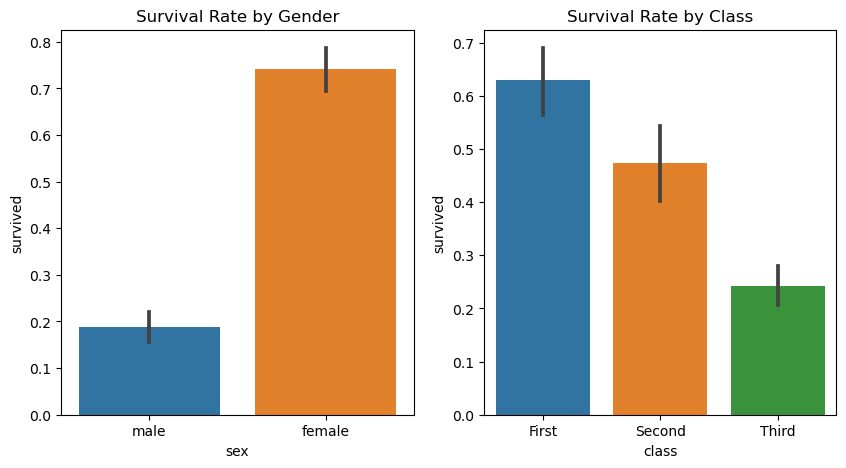

In [18]:
#성별 그래프
plt.figure(figsize=(10,5)) #사이즈 조절
plt.subplot(1,2,1) #줄,칸,위치
sns.barplot(x= 'sex', y = 'survived',data= titanic)
plt.title('Survival Rate by Gender')

plt.subplot(1,2,2)
sns.barplot(x= 'class', y = 'survived',data= titanic)
plt.title('Survival Rate by Class')

plt.show()

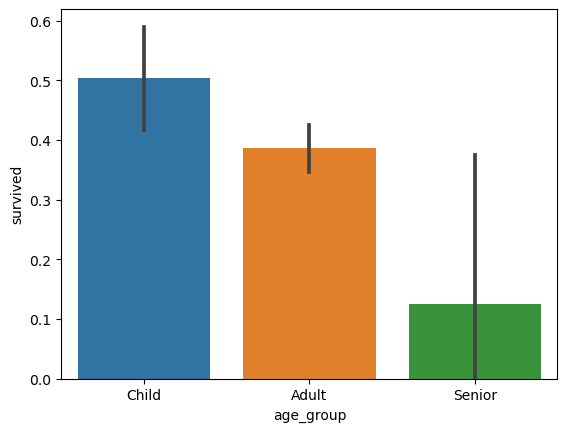

In [19]:
#연령별 생존률

sns.barplot(x= 'age_group', y = 'survived',data= titanic)
plt.show()

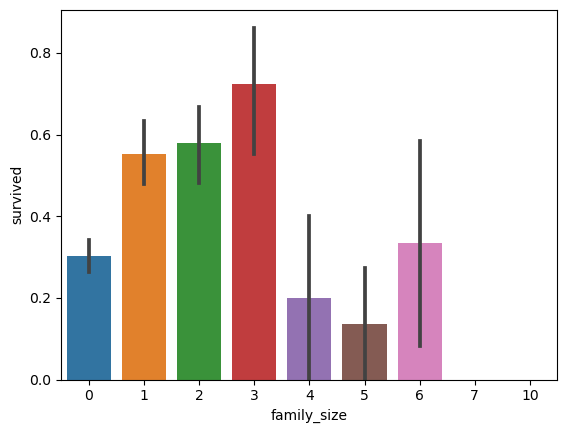

In [20]:
#가족 규모가 생존에 미치는 영향
sns.barplot(x= 'family_size', y = 'survived',data= titanic)
plt.show()

기본 정보 확인, 결측치 확인 후 데이터 정리

In [23]:
titanic.isnull().sum()

survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       2
alive             0
alone             0
age_group       177
fare_bracket     18
family_size       0
dtype: int64

In [27]:
#불필요한 값을 처리하거나 불필요한 열을 제거
#age 널값을 median으로 대처하자
titanic['age'].fillna(titanic['age'].median(),inplace=True)

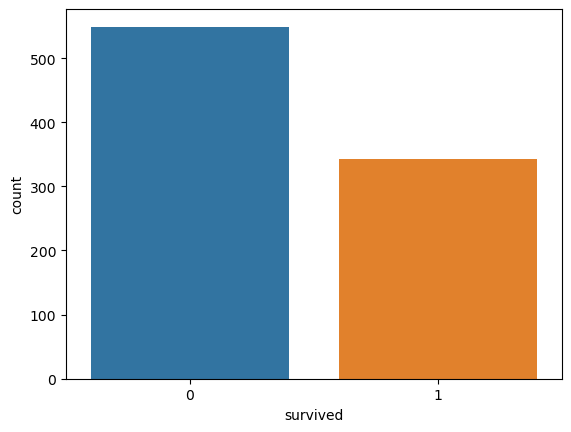

In [29]:
#분석 및 시각화
#생존률
sns.countplot(x='survived',data=titanic)
plt.show()

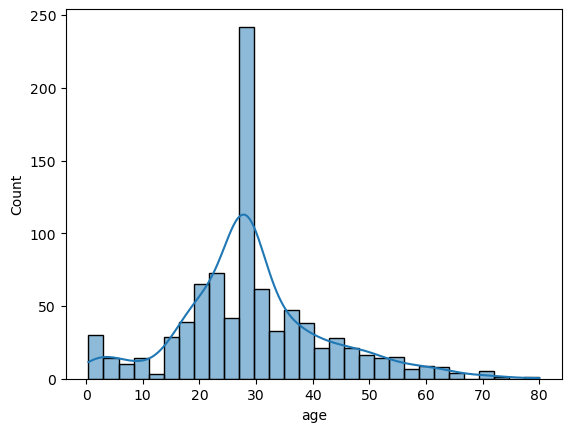

In [30]:
#연령 분포도 histplot
sns.histplot(titanic['age'],kde=True)
plt.show()

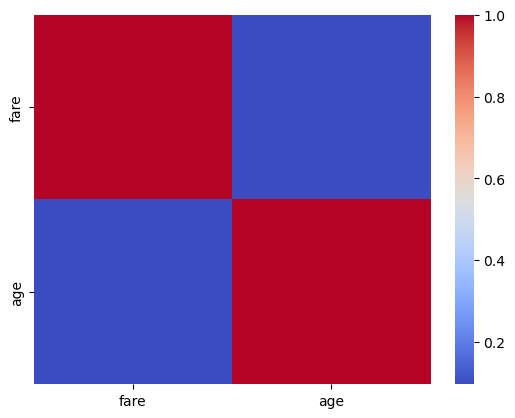

In [31]:
#상관 관계 히트멥 heatmap
sns.heatmap(titanic[['fare','age']].corr(),annot=False,cmap='coolwarm')
plt.show()